# computer vision

# fashion MNIST

In [1]:
import tensorflow as tf

In [2]:
fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

In [3]:
fmnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'e:\\Tensorflow_Exam\\te\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

LABEL: 1
\image pixel array:
 [[  0   0   0   0   0   0   0   0   0   0   0  97  84  97 110 108  87  97   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  19 255 199 183 142 161 200 213  32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  72 174 173 158 131 132 176 176  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 142 180 163 120 180 126 139 168 122   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 156 180 162 171 170 183 163 169 144   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 159 177 163 174 166 173 170 163 148   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 160 182 160 168 175 167 157 168 139   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 143 185 161 171 184 176 160 175 131   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 143 188 

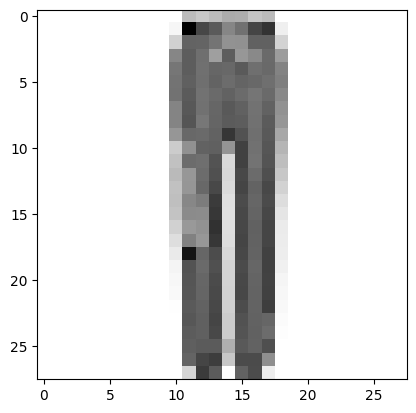

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

# can put between 0 to 59999 here
index = 1000

# setting number of charecters per row when printing
np.set_printoptions(linewidth=320)

# print the label and image 
print(f'LABEL: {train_labels[index]}')
print(f'\image pixel array:\n {train_images[index]}')

# visualize the image 
plt.imshow(train_images[index],cmap='Greys')
      
      



All the values are between 0 to 255 . while working on your network, it is better to have values between 0 nad 1 . it is called normalization 

In [5]:
# normalizing pixel values of the train and test image 
train_images = train_images / 255.0
test_images = test_images / 255.0

<b> Now design the model </b>

In [6]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the loss falls below 0.4

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the loss
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [7]:
model =  tf.keras.Sequential([tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(128,activation=tf.nn.relu),
                              tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now: 

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```
if x > 0: 
  return x

else: 
  return 0
```

In other words, it only passes values greater than 0 to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.


In [8]:
# declare sample inputs and convert to a tensor 
inputs = np.array([[1.0,3.0,4.0,2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

#feed the inputes to a softmax actiavtion function 
outputs = tf.keras.activations.softmax(inputs)
print(f'input to softmax function: {outputs.numpy()}')

# get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of output: {sum}')

# get index with highest values
prediction = np.argmax(outputs)
print(f'class with highest probablity : {prediction}') 

input to softmax function: [[1. 3. 4. 2.]]
input to softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of output: 1.0
class with highest probablity : 2


In [9]:
model.compile(optimizer= tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with a callback
model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4987 - accuracy: 0.8242
Epoch 2/10
1856/1875 [============================>.] - ETA: 0s - loss: 0.3738 - accuracy: 0.8656
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3733 - accuracy: 0.8657


In [10]:
# evaluting the model using unseen data 
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 807us/step - loss: 0.3824 - accuracy: 0.8638


[0.3824138641357422, 0.8637999892234802]

# convolutions and pooling